# Supervised Learning: Linear Regression

In this section we will be working through linear regression with the following steps:

* Step 1: Getting and setting up the data.
* Step 2: Visualizing current data.
* Step 3: The mathematics behind the Least Squares Method.
* Step 4: Using Numpy for a Univariate Linear Regression.
* Step 5: Getting the error.
* Step 6: Using scikit learn to implement a multivariate regression.
* Step 7: Using Training and Validation.  
* Step 8: Predicting Prices
* Step 9: Residual Plots

The Jupyter Notebook from Jose Portilla is [available here](http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb#Step-1:-Getting-and-setting-up-the-data.).

## Step 1: Getting and setting up the data.

In [1]:
# initial imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
% matplotlib inline

In [2]:
# import a dataset from scikit learn
from sklearn.datasets import load_boston

boston = load_boston() # Dataset with information about Boston housing prices

In [3]:
print boston.DESCR # Inner method to show dataset description

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Step 2: Visualizing current data

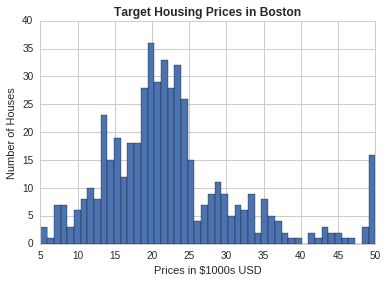

In [4]:
# A quick histogram to show the data
plt.hist(boston.target, bins = 50)
plt.xlabel("Prices in $1000s USD")
plt.ylabel('Number of Houses')
plt.title("Target Housing Prices in Boston", weight = "bold")

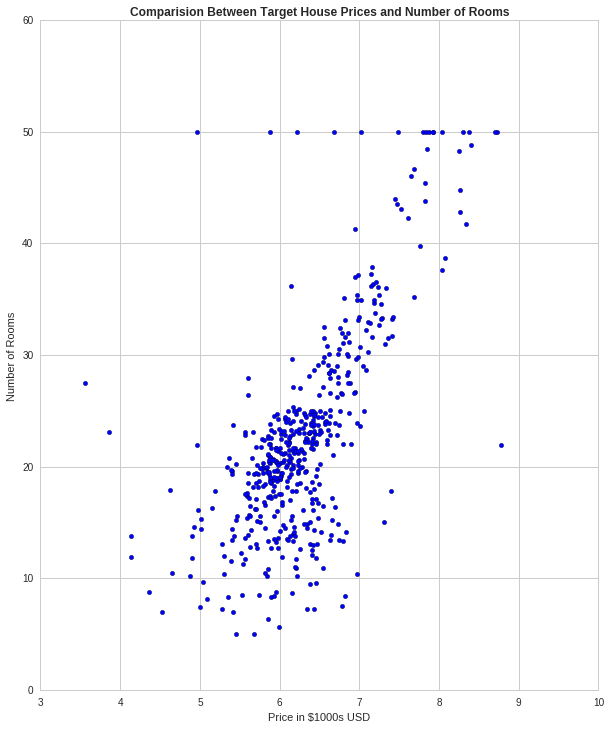

In [5]:
# Scatter plot about the number of rooms and the target price

# The 6th column of the dataset 'RM' is the average number of rooms
plt.figure(figsize = (10, 12))
plt.scatter(boston.data[:, 5], boston.target)

plt.xlabel("Price in $1000s USD")
plt.ylabel("Number of Rooms")
plt.title("Comparision Between Target House Prices and Number of Rooms", weight = "bold")

In [6]:
# We will transform the Bosto dataset to a dataframe to ease data manipulation.

# The data, feature_names and target methods are particular for this dataset
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


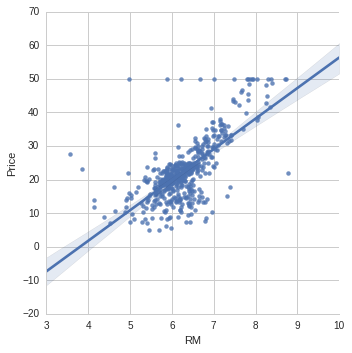

In [7]:
# Linear model using seaborn
sns.lmplot('RM', 'Price', data = boston_df)

## Step 3: The mathematics behind the Least Squares Method.

A very nice introduction is presented in [this video](https://youtu.be/Qa2APhWjQPc).

## Step 4: Using Numpy for a Univariate Linear Regression.

In [8]:
# Define the value of the variable to be observed, in this case the avergage number of rooms

# vstack: Stack arrays in sequence vertically (row wise).
# We need it to later indicate that we have one feature for analysis.
X = np.vstack(boston_df.RM)
X = np.array([ [value, 1] for value in X ]) # Create an array in the for [x, 1] for one variable linear regression

Y = boston_df.Price

In [9]:
# Now get out m and b values for our best fit line with the less squared method.
m, b = np.linalg.lstsq(X, Y)[0] # http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html

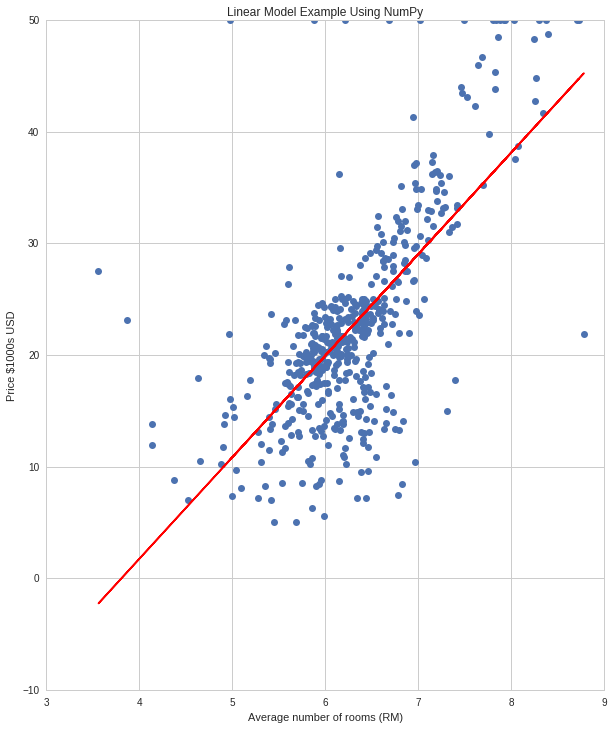

In [10]:
# Finally we create the plot using the calculated data

plt.figure(figsize = (10, 12))
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Price $1000s USD")
plt.title("Linear Model Example Using NumPy")

# The scatter plot
plt.plot(boston_df.RM, boston_df.Price, 'o')

# Now the line from the linear model
x = boston_df.RM

# The x-axis will be the average number of rooms (RM) and the y-axis will be the formula for the linear model.
plt.plot(x, m * x + b, label = 'Best Fit Line', color = 'red')

## Step 5: Getting the error

In [13]:
# We get the least-squared error for our linear model, this value is similar to the standard deviation.
result = np.linalg.lstsq(X, Y) # Return the least-squares solution to a linear matrix equation.

error_total = result[1]

rmse = np.sqrt(error_total / len(X))

print "The root mean square error (rmse) is: %0.2f" % rmse

The root mean square error (rmse) is: 6.60


## Step 6: Using scikit learn to implement a multivariate regression

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression

In [18]:
# We create now a linear regression object
lreg = LinearRegression()

In [19]:
# Now we define the variables to the regression model based on the Boston housing dataset
X_multi = boston_df.drop('Price', 1) # The training data.

Y_target = boston_df.Price # The target value of each row in the training data.

In [20]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0
print "The estimated intercept coefficient is: %0.2f" % lreg.intercept_

# NOTE: Regression coefficients represent the mean change in the response variable
# for one unit of change in the predictor variable while holding other predictors in the model constant.
print "The number of coefficients used was: %d" % len(lreg.coef_)

The estimated intercept coefficient is: 36.49
The number of coefficients used was: 13


In [23]:
# Now we will calculate the coefficient for each variable
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df

,Features
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [24]:
# Let's calculate the regressio coeffient of each variable
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


## Step 7: Using Training and Validation

In [26]:
# We start creating the testing and validation datasets using the Boston housing data.
# The 'train_test_split()' method do that for us :-)
# Test set deafault size is set to 25% of data, Train set default size is the compliment of test set, so 75%

# NOTE: Remember that X = np.vstack(boston_df.RM)
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)